## PyTorch加载数据
### 1.PyTorch加载数据初认识
*Dataset类*
- 提供一种方式去获取数据及其label
    - 如何获取每一个数据（样本）及其label
    - 需获得数据（样本）个数
- 获取数据集中的某一类数据和标签并对其进行自动编号

*Dataloader类*
- 将数据集(dataset)进行打包丢进模型训练
- 为后面的网络（模型）提供不同的数据形式

#### 1.1.Dataset类代码实战


In [4]:
%matplotlib inline

from torch.utils.data import Dataset
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor,Lambda
import cv2 as cv
from torchvision import transforms
from PIL import Image

help(Dataset)

Help on class Dataset in module torch.utils.data.dataset:

class Dataset(typing.Generic)
 |  An abstract class representing a :class:`Dataset`.
 |  
 |  All datasets that represent a map from keys to data samples should subclass
 |  it. All subclasses should overwrite :meth:`__getitem__`, supporting fetching a
 |  data sample for a given key. Subclasses could also optionally overwrite
 |  :meth:`__len__`, which is expected to return the size of the dataset by many
 |  :class:`~torch.utils.data.Sampler` implementations and the default options
 |  of :class:`~torch.utils.data.DataLoader`.
 |  
 |  .. note::
 |    :class:`~torch.utils.data.DataLoader` by default constructs a index
 |    sampler that yields integral indices.  To make it work with a map-style
 |    dataset with non-integral indices/keys, a custom sampler must be provided.
 |  
 |  Method resolution order:
 |      Dataset
 |      typing.Generic
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __add__(self, oth

In [3]:
Dataset??

In [4]:
import os
train_datasetDir='/media/zhang/Disk0/dataset/d2l/data/hotdog/train'
test_datasetDir='/media/zhang/Disk0/dataset/d2l/data/hotdog/test'
os.listdir(test_datasetDir)

['not-hotdog', 'hotdog']

In [5]:
label_not_hotdog_dir='not-hotdog'
label_hotdog_dir='hotdog'
os.path.join(train_datasetDir,label_hotdog_dir)  # 将两个路径连接起来

'/media/zhang/Disk0/dataset/d2l/data/hotdog/train/hotdog'

In [6]:


"""
Dataset类实战
"""


class MyData(Dataset):  # 继承Dataset类
    def __init__(self,root_dir,label_dir):  # 初始化函数，传入数据集文件夹和标签文件夹
        self.root_dir=root_dir  # 初始化对象
        self.label_dir=label_dir  # 初始化对象
        self.path=os.path.join(self.root_dir,self.label_dir)  # 添加属性
        self.img_path=os.listdir(self.path)  # 添加属性

    def __getitem__(self, idx):  # 返回单个样本及其标签
        img_name=self.img_path[idx]
        img_item_path=os.path.join(self.root_dir,self.label_dir,img_name)
        img=Image.open(img_item_path)
        label=self.label_dir
        return img,label

    def __len__(self):  # 返回数据集中样本个数
        return len(self.img_path)

hotdog_train_data=MyData(train_datasetDir,label_hotdog_dir)
hotdog_train_data.__len__()

1000

In [7]:
img,label=hotdog_train_data[0]  # 获取热狗训练集的第一个对象

In [8]:
type(img),label

(PIL.PngImagePlugin.PngImageFile, 'hotdog')

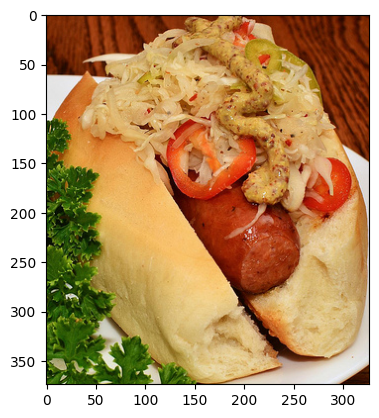

In [10]:
plt.imshow(img)

### [2.Tensorboard的使用——可视化训练过程](https://pytorch.org/tutorials/recipes/recipes/tensorboard_with_pytorch.html)
TensorBoard是一个用于机器学习实验的可视化工具包。 TensorBoard允许跟踪和可视化指标，例如损失和准确性， 可视化模型图、查看直方图、显示图像等等。 在本教程中，我们将介绍张量板安装， PyTorch 的基本用法，以及如何可视化您在 TensorBoard UI 中记录的数据。
- SummaryWriter.add_image()  # Add image data to summary
- SummaryWriter.add_scalar()  # Add scalar data to summary


#### 2.1.Installation

In [11]:
!pip install torch torchvision

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


#### 2.2.Using TensorBroad in PyTorch

In [12]:


"""
create a instance `SummaryWriter`
"""
writer=SummaryWriter()  # writer will output to directory by default. `/runs/`

"""
Log scalars
- Scalar helps to save the loss value of each training step, or the accuracy after each epoch.
- To log a scalar value, use . For example, lets create a simple linear regression training, and log loss value using

    ` add_scalar(tag, scalar_value, global_step=None, walltime=None) add_scalar `
"""
x=torch.arange(-5,5,0.1).view(-1,1)  # 从-5到5每隔0.1生成一个数，形状为（-1,1），即100行1列
x.shape,x.size()

(torch.Size([100, 1]), torch.Size([100, 1]))

In [13]:
y=-5*x+0.1*torch.randn(x.size())
y.shape

torch.Size([100, 1])

In [15]:
model=torch.nn.Linear(1,1) # 模型
criterion=torch.nn.MSELoss()  # 损失函数
optimizer=torch.optim.SGD(model.parameters(),lr=0.1)  # 优化器

def train_model(iter):
    for epoch in range(iter):
        y_hat=model(x)  # 根据当前模型求y_hat
        loss=criterion(y_hat,y)  # 计算损失

        writer.add_scalar('Loss/train',loss,epoch)  # 将损失和轮次写入board

        optimizer.zero_grad()  # 梯度归零
        loss.backward()  # 损失回传
        optimizer.step()

train_model(10)

"""
See `torch.utils.tensorboard tutorials` to find more TensorBoard visualization types you can log.
"""

writer.flush()  # Call flush() method to make sure that all pending events have been written to disk.


writer.close()  # If you do not need the summary writer anymore, call close() method.

#### 2.3.Run TensorBoard

In [ ]:
"""
TensorBoard 2.11.0 at http://localhost:6006/ (Press CTRL+C to quit)
"""
# !tensorboard --logdir=./runs

!tensorboard --logdir=./runs --port=6007  # 指定端口打开

### 3.torchvision中的transforms.py
We use transforms to perform some manipulation of the data and make it suitable for training.

All TorchVision datasets have two parameters `-transform` to modify the features and `target_transform` to modify the labels - that accept callables containing the transformation logic. The [torchvision.transforms](https://pytorch.org/vision/stable/transforms.html) module offers several commonly-used transforms out of the box.

关注输入和输出类型，多看官方文档，关注方法需要的参数

- ToTensor: Convert a ``PIL Image`` or ``numpy.ndarray`` to tensor.
- ToPILImage: Convert a `tensor` or an `ndarray` to `PIL Image`.
- Compose: Composes several transforms together.
- Normalize: Normalize a tensor image with `mean` and `standard deviation`.
- Resize: Resize the input image to the given size.
- Compose: Composes several transforms together.
- RandomCrop: Crop the given image at a random location.

In [6]:
"""
The FashionMNIST features are in PIL Image format, and the labels are integers. For training, we need the features as **normalized tensors**, and the labels as one-hot encoded tensors.

To make these transformations, we use `ToTensor` and `Lambda`.
"""



ds=datasets.FashionMNIST(
    root='../../data',
    train=True,
    download=True,
    transform=ToTensor(),

    # define a lambda function to turn the integer into a one-hot encoded tensor.

    # It first creates a zero tensor of size 10 (the number of labels in our dataset) and calls scatter_ which assigns a value=1 on the index as given by the label y.
    target_transform=Lambda(lambda y:torch.zeros(10,dtype=torch.float).scatter_(0,torch.tensor(y),value=1))
)

#### 3.1.ToTensor()
[ToTensor](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.ToTensor) converts a PIL image or NumPy `ndarray` into a `FloatTensor`. and scales the image’s pixel intensity values in the range [0., 1.]

In [34]:


img=cv.imread('/media/zhang/Disk0/dataset/d2l/data/hotdog/train/hotdog/71.png')
type(img),img.shape,type(img)

(numpy.ndarray, (112, 310, 3), numpy.ndarray)

In [35]:
img

array([[[128, 145, 208],
        [124, 141, 204],
        [124, 140, 206],
        ...,
        [  8,  10,  10],
        [  6,   8,   8],
        [  4,   9,   8]],

       [[128, 143, 206],
        [127, 143, 209],
        [125, 141, 207],
        ...,
        [  6,   8,   8],
        [  8,  10,  10],
        [  5,  10,   9]],

       [[127, 142, 205],
        [129, 145, 211],
        [127, 143, 209],
        ...,
        [  6,   8,   8],
        [ 11,  13,  13],
        [  6,  11,  10]],

       ...,

       [[ 45,  44,  84],
        [ 39,  40,  78],
        [ 42,  46,  81],
        ...,
        [ 32,  26,  21],
        [ 27,  21,  16],
        [ 32,  25,  22]],

       [[ 59,  88, 125],
        [ 68,  96, 131],
        [ 47,  78, 109],
        ...,
        [ 34,  28,  23],
        [ 32,  26,  21],
        [ 31,  24,  21]],

       [[160, 196, 212],
        [130, 165, 179],
        [121, 162, 171],
        ...,
        [ 32,  26,  21],
        [ 32,  26,  21],
        [ 29,  23,  18]]

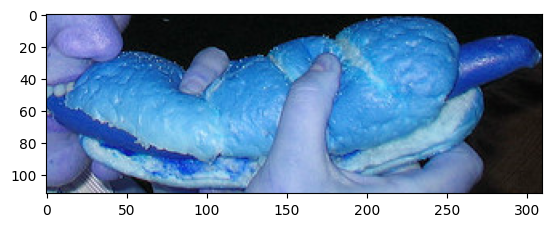

In [36]:
plt.imshow(img)

In [37]:
tensor_trans=transforms.ToTensor()
tensor_img=tensor_trans(img)
type(tensor_img),tensor_img.shape  # tensor是一个封装神经网络所需的各种属性的类

(torch.Tensor, torch.Size([3, 112, 310]))

In [38]:
tensor_img

tensor([[[0.5020, 0.4863, 0.4863,  ..., 0.0314, 0.0235, 0.0157],
         [0.5020, 0.4980, 0.4902,  ..., 0.0235, 0.0314, 0.0196],
         [0.4980, 0.5059, 0.4980,  ..., 0.0235, 0.0431, 0.0235],
         ...,
         [0.1765, 0.1529, 0.1647,  ..., 0.1255, 0.1059, 0.1255],
         [0.2314, 0.2667, 0.1843,  ..., 0.1333, 0.1255, 0.1216],
         [0.6275, 0.5098, 0.4745,  ..., 0.1255, 0.1255, 0.1137]],

        [[0.5686, 0.5529, 0.5490,  ..., 0.0392, 0.0314, 0.0353],
         [0.5608, 0.5608, 0.5529,  ..., 0.0314, 0.0392, 0.0392],
         [0.5569, 0.5686, 0.5608,  ..., 0.0314, 0.0510, 0.0431],
         ...,
         [0.1725, 0.1569, 0.1804,  ..., 0.1020, 0.0824, 0.0980],
         [0.3451, 0.3765, 0.3059,  ..., 0.1098, 0.1020, 0.0941],
         [0.7686, 0.6471, 0.6353,  ..., 0.1020, 0.1020, 0.0902]],

        [[0.8157, 0.8000, 0.8078,  ..., 0.0392, 0.0314, 0.0314],
         [0.8078, 0.8196, 0.8118,  ..., 0.0314, 0.0392, 0.0353],
         [0.8039, 0.8275, 0.8196,  ..., 0.0314, 0.0510, 0.

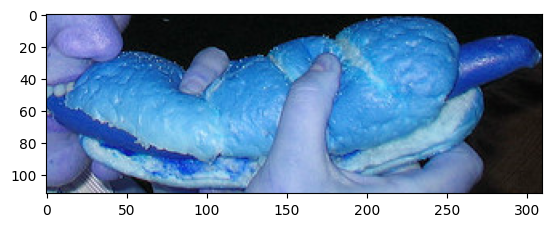

In [39]:
transToPIL=transforms.ToPILImage('RGB')  # Convert a tensor or an ndarray to PIL Image.
plt.imshow(transToPIL(tensor_img))

#### 3.2.Lambda Transforms
Lambda transforms apply any user-defined lambda function.

#### 3.3.Normalize()————归一化（区别于Regulation(正则化)）
Normalize a tensor image with mean and standard deviation.
- Normalization helps get data within a range and reduces the skewness(偏倚) which helps learn faster and better.
- Normalization can also tackle the diminishing and exploding gradients problems.
- 归一化将原始图像转换为唯一标准形式图像，该标准形式图像对平移、旋转、缩放等仿射变换具有不变性

In [11]:
"""
output[channel] = (input[channel] - mean[channel]) / std[channel]

Args:
    mean (sequence): Sequence of means for each channel.
    std (sequence): Sequence of standard deviations for each channel.
    inplace(bool,optional): Bool to make this operation in-place.
"""
trans_norm=transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
img_norm=trans_norm(tensor_img)
img_norm

tensor([[[ 0.0039, -0.0275, -0.0275,  ..., -0.9373, -0.9529, -0.9686],
         [ 0.0039, -0.0039, -0.0196,  ..., -0.9529, -0.9373, -0.9608],
         [-0.0039,  0.0118, -0.0039,  ..., -0.9529, -0.9137, -0.9529],
         ...,
         [-0.6471, -0.6941, -0.6706,  ..., -0.7490, -0.7882, -0.7490],
         [-0.5373, -0.4667, -0.6314,  ..., -0.7333, -0.7490, -0.7569],
         [ 0.2549,  0.0196, -0.0510,  ..., -0.7490, -0.7490, -0.7725]],

        [[ 0.1373,  0.1059,  0.0980,  ..., -0.9216, -0.9373, -0.9294],
         [ 0.1216,  0.1216,  0.1059,  ..., -0.9373, -0.9216, -0.9216],
         [ 0.1137,  0.1373,  0.1216,  ..., -0.9373, -0.8980, -0.9137],
         ...,
         [-0.6549, -0.6863, -0.6392,  ..., -0.7961, -0.8353, -0.8039],
         [-0.3098, -0.2471, -0.3882,  ..., -0.7804, -0.7961, -0.8118],
         [ 0.5373,  0.2941,  0.2706,  ..., -0.7961, -0.7961, -0.8196]],

        [[ 0.6314,  0.6000,  0.6157,  ..., -0.9216, -0.9373, -0.9373],
         [ 0.6157,  0.6392,  0.6235,  ..., -0

#### 3.4.Resize()
Resize the input image to the given size.
- 可接受的数据类型为`PIL`或`tensor`类型

In [30]:
img.size,img.shape,type(img)

(104160, (112, 310, 3), numpy.ndarray)

In [11]:


"""
numpy.ndarray -> PIL.Image.Image

transforms.Resize([h, w])  # 指定输出大小
"""
trans_resize1=transforms.Resize([512,512])
imgPIL_resize=trans_resize1(Image.fromarray(img))  # 将numpy.ndarray转为PIL Image
imgPIL_resize.size,type(imgPIL_resize)

((512, 512), PIL.Image.Image)

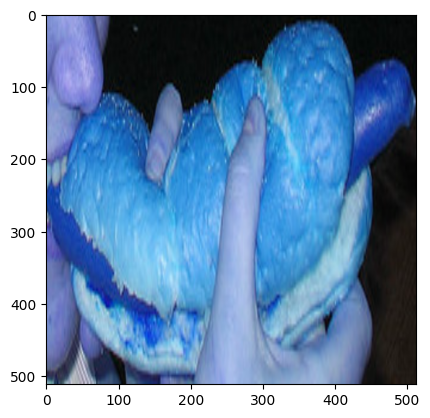

In [45]:
plt.imshow(imgPIL_resize)

In [37]:
"""
torch.Tensor -> torch.Tensor
"""
imgTensor=trans_resize1(tensor_img)
imgTensor.size,imgTensor.shape,type(imgTensor)

(<function Tensor.size>, torch.Size([3, 512, 512]), torch.Tensor)

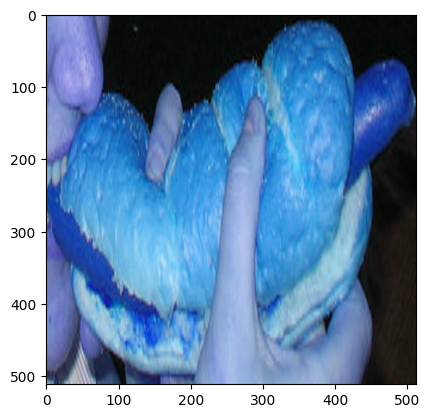

In [43]:
plt.imshow(transToPIL(imgTensor))

In [60]:
"""
transforms.Resize(x) # 指定图片长度为x，长宽比保持不变
"""
trans_resize2=transforms.Resize(150)
imgZoom=trans_resize2(tensor_img)
imgZoom.shape,type(imgZoom)

(torch.Size([3, 150, 415]), torch.Tensor)

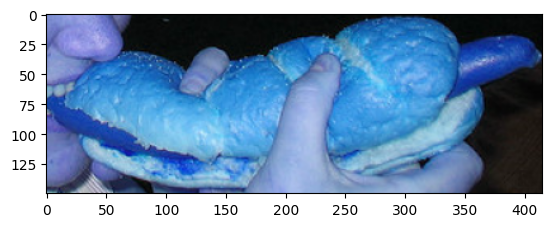

In [61]:
plt.imshow(transToPIL(imgZoom))

#### 3.5.Compose()
Composes several transforms together.
Compose()中的参数需要是一个列表
- Compose([transforms参数1,transforms参数2,...])
- 需注意相邻变换的输出类型和输入类型要相互匹配

In [75]:
"""
调整opencv读取的图片的尺寸: numpy.ndarray -> torch.Tensor -> Resize

"""
trans_compose= transforms.Compose([tensor_trans,trans_resize2])
img_compose=trans_compose(img)
img_compose.shape,type(img_compose)

(torch.Size([3, 150, 415]), torch.Tensor)

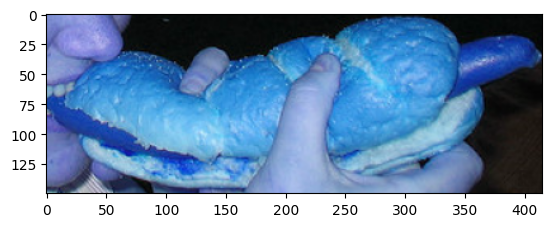

In [77]:
plt.imshow(transToPIL(img_compose))

#### 3.6.RandomCrop()
Crop the given image at a random location.

In [4]:
type(img),img.shape

(numpy.ndarray, (112, 310, 3))

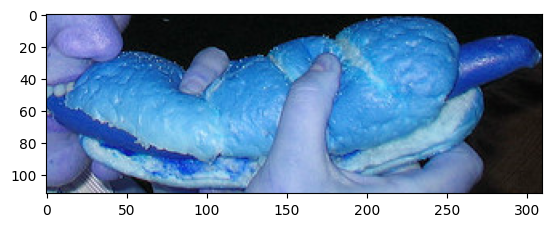

In [44]:
plt.imshow(img)

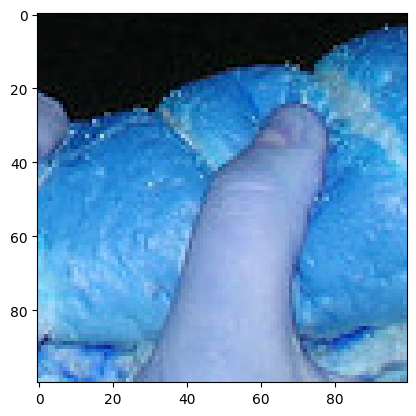

In [31]:
"""
随机裁减大小为100(h) * 100(w)的区域
"""
trans_crop1=transforms.RandomCrop(100)
img_crop1=trans_crop1(Image.fromarray(img))  # 将numpy.ndarray转为PIL Image
plt.imshow(img_crop1)

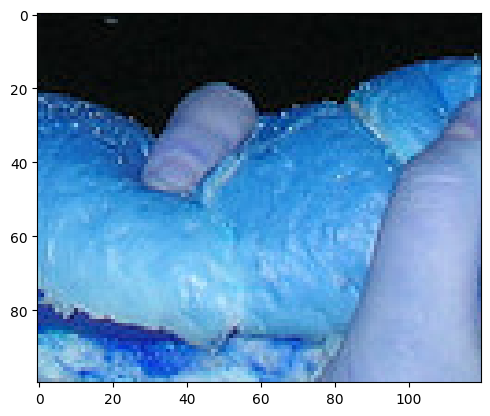

In [43]:
"""
随机裁减大小为100(h) * 120(w)的区域
"""
trans_crop2=transforms.RandomCrop([100,120])
img_crop2=trans_crop2(Image.fromarray(img))  # 将numpy.ndarray转为PIL Image
plt.imshow(img_crop2)

### 4.torchvision中的数据集使用
The [torchvision](https://pytorch.org/vision/stable/index.html) package consists of popular datasets, model architectures, and common image transformations for computer vision.

Torchvision provides many built-in datasets in the `torchvision.datasets module`, as well as utility classes for building your own datasets.

In [26]:
import torchvision
"""
使用内置的CIFAR10数据集，The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class.

There are 50000 training images and 10000 test images.

- Ctrl+p：显示需传入的参数
- 原始数据集为PIL Image，需转为tensor使用
"""
dataPath='/media/zhang/Disk0/dataset/d2l/data'

dataset_transform=torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])

train_set=torchvision.datasets.CIFAR10(
    root=dataPath,
    train=True,
    transform=dataset_transform,
    download=False
)
test_set=torchvision.datasets.CIFAR10(
    root=dataPath,
    train=False,
    transform=dataset_transform,
    download=False
)

"""
显示对象的所有属性
"""
dir(test_set)

['__add__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_integrity',
 '_format_transform_repr',
 '_is_protocol',
 '_load_meta',
 '_repr_indent',
 'base_folder',
 'class_to_idx',
 'classes',
 'data',
 'download',
 'extra_repr',
 'filename',
 'meta',
 'root',
 'target_transform',
 'targets',
 'test_list',
 'tgz_md5',
 'train',
 'train_list',
 'transform',
 'transforms',
 'url']

In [27]:
test_set.__len__()

10000

In [28]:
test_set.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [29]:
test_set[0],type(test_set[0])

((tensor([[[0.6196, 0.6235, 0.6471,  ..., 0.5373, 0.4941, 0.4549],
           [0.5961, 0.5922, 0.6235,  ..., 0.5333, 0.4902, 0.4667],
           [0.5922, 0.5922, 0.6196,  ..., 0.5451, 0.5098, 0.4706],
           ...,
           [0.2667, 0.1647, 0.1216,  ..., 0.1490, 0.0510, 0.1569],
           [0.2392, 0.1922, 0.1373,  ..., 0.1020, 0.1137, 0.0784],
           [0.2118, 0.2196, 0.1765,  ..., 0.0941, 0.1333, 0.0824]],
  
          [[0.4392, 0.4353, 0.4549,  ..., 0.3725, 0.3569, 0.3333],
           [0.4392, 0.4314, 0.4471,  ..., 0.3725, 0.3569, 0.3451],
           [0.4314, 0.4275, 0.4353,  ..., 0.3843, 0.3725, 0.3490],
           ...,
           [0.4863, 0.3922, 0.3451,  ..., 0.3804, 0.2510, 0.3333],
           [0.4549, 0.4000, 0.3333,  ..., 0.3216, 0.3216, 0.2510],
           [0.4196, 0.4118, 0.3490,  ..., 0.3020, 0.3294, 0.2627]],
  
          [[0.1922, 0.1843, 0.2000,  ..., 0.1412, 0.1412, 0.1294],
           [0.2000, 0.1569, 0.1765,  ..., 0.1216, 0.1255, 0.1333],
           [0.1843, 0.

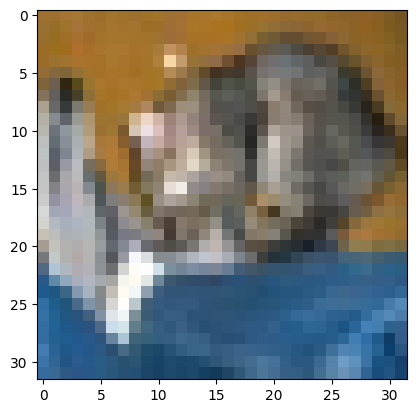

In [40]:
img=test_set[0][0]  # 验证集的第一个样本的第一个属性
plt.imshow(transToPIL(img))

In [41]:
tag=test_set[0][1]  # 验证集的第一个样本的第二个属性
tag,test_set.classes[tag]

(3, 'cat')

### 5.[DataLoader()的使用](https://pytorch.org/docs/stable/data.html)


In [76]:
from torch.utils.data import DataLoader

"""
Data loader. Combines a dataset and a sampler, and provides an iterable over the given dataset.

torch.utils.data.DataLoader(
    dataset,
    batch_size=1,
    shuffle=None,
    sampler=None,
    batch_sampler=None,
    num_workers=0,
    collate_fn=None,
    pin_memory=False,
    drop_last=False,
    timeout=0,
    worker_init_fn=None,
    multiprocessing_context=None,
    generator=None,
    *,
    prefetch_factor=2,
    persistent_workers=False,
    pin_memory_device='')

Ctrl+p: 查看所需参数
"""
test_loader=torch.utils.data.DataLoader(
                        test_set,
                       batch_size=32,
                       shuffle=True,
                       num_workers=8,
                        drop_last=True)  # 若最后取的时候不足32个样本，则舍去
dir(test_loader)

['_DataLoader__initialized',
 '_DataLoader__multiprocessing_context',
 '_IterableDataset_len_called',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_auto_collation',
 '_dataset_kind',
 '_get_iterator',
 '_index_sampler',
 '_is_protocol',
 '_iterator',
 'batch_sampler',
 'batch_size',
 'check_worker_number_rationality',
 'collate_fn',
 'dataset',
 'drop_last',
 'generator',
 'multiprocessing_context',
 'num_workers',
 'persistent_workers',
 'pin_memory',
 'pin_memory_device',
 'prefetch_factor',
 'sampler',
 'timeout',
 'worker_init_fn']

In [55]:
enumerate(test_loader)

In [ ]:
data = next(enumerate(test_loader))  # 取第一个test_loader对象

In [65]:
data[1]  # 第一个对象的内容

[tensor([[[[0.2471, 0.2588, 0.2941,  ..., 0.7961, 0.8000, 0.7922],
           [0.3020, 0.2784, 0.3255,  ..., 0.7725, 0.8078, 0.7922],
           [0.3490, 0.3216, 0.3843,  ..., 0.6824, 0.7333, 0.7608],
           ...,
           [0.2000, 0.2235, 0.2627,  ..., 0.5255, 0.4706, 0.4549],
           [0.1961, 0.2157, 0.2314,  ..., 0.4980, 0.4118, 0.3725],
           [0.2196, 0.2078, 0.1843,  ..., 0.4667, 0.3333, 0.3098]],
 
          [[0.2471, 0.2588, 0.2941,  ..., 0.7961, 0.8000, 0.7922],
           [0.3020, 0.2784, 0.3255,  ..., 0.7725, 0.8078, 0.7922],
           [0.3490, 0.3216, 0.3843,  ..., 0.6824, 0.7333, 0.7608],
           ...,
           [0.2000, 0.2235, 0.2627,  ..., 0.5255, 0.4706, 0.4549],
           [0.1961, 0.2157, 0.2314,  ..., 0.4980, 0.4118, 0.3725],
           [0.2196, 0.2078, 0.1843,  ..., 0.4667, 0.3333, 0.3098]],
 
          [[0.2471, 0.2588, 0.2941,  ..., 0.7961, 0.8000, 0.7922],
           [0.3020, 0.2784, 0.3255,  ..., 0.7725, 0.8078, 0.7922],
           [0.3490, 0.32

In [63]:
img,tag=data[1][0],data[1][1]  # 分别赋值
img.shape,tag  # 因为batchSize为32,故一个对象包含32张图片及相应的32个标签

(torch.Size([32, 3, 32, 32]),
 tensor([3, 5, 4, 7, 2, 9, 3, 0, 8, 9, 2, 1, 3, 0, 0, 9, 3, 7, 0, 2, 8, 8, 3, 0,
         7, 9, 6, 0, 7, 0, 5, 4]))

(<matplotlib.image.AxesImage at 0x7fe5741411e0>, 'cat')

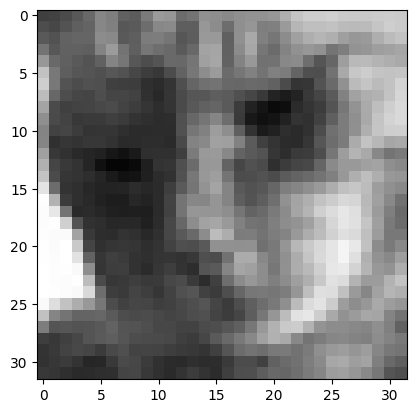

In [74]:
# 显示该批次的第一张图片及标签
plt.imshow(transToPIL(img[0])),test_set.classes[tag[0]]

In [79]:
"""
epoch加载数据集，并使用tensorboard查看每个epoch的数据集
- 若无法正常显示图片，将logdir改为绝对路径
"""
from torch.utils.tensorboard import SummaryWriter
writer=SummaryWriter('./runsLog/dataloader')

for epoch in range(2):
    step=0
    for data in test_loader:
        img,tag=data
        writer.add_images(f'epoch:{epoch}',img,step)  # shuffle=True，每个epoch显示的图片不同
        step=step+1

writer.close()


In [ ]:
!tensorboard --logdir=/home/zhang/PycharmProjects/d2l/zhang/chap0/pytorch/dataloader